In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from math import sqrt
import time
import seaborn as sns; sns.set()
import numpy
import math
from sklearn.metrics import precision_score
from math import sqrt

# Importação e Definição dos Sets

In [2]:
col_names = ["date", "hour", "values", "detection"]
#train_df = pd.read_csv('train_barreiro.csv',sep=';', names= col_names)
#train_df = pd.read_csv('train_barreiro_3.csv',sep=';', names= col_names)
#train_df = pd.read_csv('train_barreiro_2.csv',sep=';', names= col_names)
#train_df = pd.read_csv('train_barreiro_4.csv',sep=';', names= col_names)
train_df = pd.read_csv('train_iq_1.csv',sep=';', names= col_names)
#train_df = pd.read_csv('iq_treino_rotura3.csv',sep=';', names= col_names)
#train_df = pd.read_csv('iq_treino_rotura4.csv',sep=';', names= col_names)
#train_df = pd.read_csv('Beja_treino_1.csv',sep=';', names= col_names)
#train_df = pd.read_csv('Beja_treino_2.csv',sep=';', names= col_names)
#train_df = pd.read_csv('Beja_treino_3.csv',sep=';', names= col_names)
#test_df = pd.read_csv('test_barreiro.csv',sep=';', names= col_names)
#test_df = pd.read_csv('test_barreiro_3.csv',sep=';', names= col_names)
#test_df = pd.read_csv('test_barreiro_2.csv',sep=';', names= col_names)
#test_df = pd.read_csv('test_barreiro_4.csv',sep=';', names= col_names)
test_df = pd.read_csv('test_iq_1.csv',sep=';', names= col_names)
#test_df = pd.read_csv('iq_teste_rotura3_part1.csv',sep=';', names= col_names)
#test_df = pd.read_csv('iq_teste_rotura3_part2.csv',sep=';', names= col_names)
#test_df = pd.read_csv('iq_teste_rotura4.csv',sep=';', names= col_names)
#test_df = pd.read_csv('Beja_teste_1.csv',sep=';', names= col_names)
#test_df = pd.read_csv('Beja_teste_2.csv',sep=';', names= col_names)
#test_df = pd.read_csv('Beja_teste_3.csv',sep=';', names= col_names)
holidays = pd.read_csv('Holidays.csv',sep=';')
year = pd.read_csv('barreiro_ano.csv',sep=';', names= col_names)

In [3]:
year['month'] = pd.to_datetime(year['date'],dayfirst=True)
year['month'] = year['month'].dt.month

# Valor Médio de Caudal por Mês e Ano

In [4]:
month_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in np.arange(1,13,1):
    print(month_label[i-1],'mean flow:', np.mean(year[year['month']==i]['values'].values))

Jan mean flow: 24.04876118806418
Feb mean flow: 26.29654233246912
Mar mean flow: 21.557514691837365
Apr mean flow: 22.56460650419132
May mean flow: 34.512126438476145
Jun mean flow: 40.162595249542704
Jul mean flow: 48.11482606596102
Aug mean flow: 54.65139478731855
Sep mean flow: 50.73718691621527
Oct mean flow: 39.97787004544019
Nov mean flow: 25.29344371759861
Dec mean flow: 22.931614362222444


In [5]:
print('Year mean flow:',numpy.mean(year['values'].values))

Year mean flow: 34.29768627916298


# Informação do Set

In [6]:
train_df.head()

,date,hour,values,detection
0,31/01/2017,00:07:30,81.976077,0
1,31/01/2017,00:22:30,78.459897,0
2,31/01/2017,00:37:30,70.882941,0
3,31/01/2017,00:52:30,59.618615,0
4,31/01/2017,01:07:30,68.780676,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   hour       480 non-null    object 
 2   values     480 non-null    float64
 3   detection  480 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.1+ KB


In [8]:
train_df.shape

(480, 4)

In [9]:
test_df.head()

,date,hour,values,detection
0,07/02/2017,00:07:30,52.405125,0
1,07/02/2017,00:22:30,50.374528,0
2,07/02/2017,00:37:30,42.898861,0
3,07/02/2017,00:52:30,43.393778,0
4,07/02/2017,01:07:30,47.761917,0


In [10]:
test_df.shape

(96, 4)

In [11]:
holidays

,date
0,1970-01-01
1,1970-03-27
2,1970-03-29
3,1970-05-28
4,1970-10-05
...,...
759,2029-05-01
760,2029-06-10
761,2029-08-15
762,2029-12-08


In [12]:
holidays['date'] = pd.to_datetime(holidays['date'])

In [13]:
train_df['date']

0      31/01/2017
1      31/01/2017
2      31/01/2017
3      31/01/2017
4      31/01/2017
          ...    
475    06/02/2017
476    06/02/2017
477    06/02/2017
478    06/02/2017
479    06/02/2017
Name: date, Length: 480, dtype: object

In [14]:
test_df['date']

0     07/02/2017
1     07/02/2017
2     07/02/2017
3     07/02/2017
4     07/02/2017
         ...    
91    07/02/2017
92    07/02/2017
93    07/02/2017
94    07/02/2017
95    07/02/2017
Name: date, Length: 96, dtype: object

# Processamento de Dados

In [15]:
train_df['int_date'] = pd.to_datetime(train_df['date'],dayfirst=True).dt.strftime("%Y%m%d").astype(int)
test_df['int_date'] = pd.to_datetime(test_df['date'],dayfirst=True).dt.strftime("%Y%m%d").astype(int)
holidays['int_date'] = pd.to_datetime(holidays['date']).dt.strftime("%Y%m%d").astype(int)

In [16]:
train_df[train_df['int_date']==20180815]

,date,hour,values,detection,int_date


In [17]:
def check_holiday(df,holi_df):
    
    index_to_drop = []
    count = 0
    for i in df['int_date'].values:
        if i in holi_df['int_date'].values:
            index_to_drop.append(count)
        count+=1
        
    dropped_df = df.drop(index_to_drop)
    
    return dropped_df

In [18]:
train_data = check_holiday(train_df,holidays)

In [19]:
train_data

,date,hour,values,detection,int_date
0,31/01/2017,00:07:30,81.976077,0,20170131
1,31/01/2017,00:22:30,78.459897,0,20170131
2,31/01/2017,00:37:30,70.882941,0,20170131
3,31/01/2017,00:52:30,59.618615,0,20170131
4,31/01/2017,01:07:30,68.780676,0,20170131
...,...,...,...,...,...
475,06/02/2017,22:52:30,44.925417,0,20170206
476,06/02/2017,23:07:30,47.979819,0,20170206
477,06/02/2017,23:22:30,50.164222,0,20170206
478,06/02/2017,23:37:30,47.979444,0,20170206


In [20]:
train_holi = train_df.merge(holidays, how='inner', on=['int_date'])

In [21]:
train_holi

,date_x,hour,values,detection,int_date,date_y


In [22]:
test_data = check_holiday(test_df,holidays)

In [23]:
test_data

,date,hour,values,detection,int_date
0,07/02/2017,00:07:30,52.405125,0,20170207
1,07/02/2017,00:22:30,50.374528,0,20170207
2,07/02/2017,00:37:30,42.898861,0,20170207
3,07/02/2017,00:52:30,43.393778,0,20170207
4,07/02/2017,01:07:30,47.761917,0,20170207
...,...,...,...,...,...
91,07/02/2017,22:52:30,39.885125,0,20170207
92,07/02/2017,23:07:30,52.764181,0,20170207
93,07/02/2017,23:22:30,66.020722,0,20170207
94,07/02/2017,23:37:30,68.884931,0,20170207


In [24]:
test_data[test_data['detection']==1]

,date,hour,values,detection,int_date
40,07/02/2017,10:07:30,96.501389,1,20170207
41,07/02/2017,10:22:30,96.000000,1,20170207
42,07/02/2017,10:37:30,95.000000,1,20170207
43,07/02/2017,10:52:30,95.473597,1,20170207
44,07/02/2017,11:07:30,142.776972,1,20170207
45,07/02/2017,11:22:30,179.830792,1,20170207
46,07/02/2017,11:37:30,195.296736,1,20170207
47,07/02/2017,11:52:30,196.413375,1,20170207
48,07/02/2017,12:07:30,175.939528,1,20170207
49,07/02/2017,12:22:30,125.651958,1,20170207


In [25]:
test_holi = test_df.merge(holidays, how='inner', on=['int_date'])
test_holi

,date_x,hour,values,detection,int_date,date_y


In [26]:
train_data

,date,hour,values,detection,int_date
0,31/01/2017,00:07:30,81.976077,0,20170131
1,31/01/2017,00:22:30,78.459897,0,20170131
2,31/01/2017,00:37:30,70.882941,0,20170131
3,31/01/2017,00:52:30,59.618615,0,20170131
4,31/01/2017,01:07:30,68.780676,0,20170131
...,...,...,...,...,...
475,06/02/2017,22:52:30,44.925417,0,20170206
476,06/02/2017,23:07:30,47.979819,0,20170206
477,06/02/2017,23:22:30,50.164222,0,20170206
478,06/02/2017,23:37:30,47.979444,0,20170206


In [27]:
train_data['timestamp'] = pd.to_datetime(train_data['hour'])
train_data['timestamp'] = train_data['timestamp'].dt.hour * 3600 + \
              train_data['timestamp'].dt.minute * 60 + \
              train_data['timestamp'].dt.second

test_data['timestamp'] = pd.to_datetime(test_data['hour'])
test_data['timestamp'] = test_data['timestamp'].dt.hour * 3600 + \
              test_data['timestamp'].dt.minute * 60 + \
              test_data['timestamp'].dt.second

In [28]:
train_data['dayofweek'] = pd.to_datetime(train_data['date'],dayfirst=True)
train_data['dayofweek'] = train_data['dayofweek'].dt.dayofweek

test_data['dayofweek'] = pd.to_datetime(test_data['date'],dayfirst=True)
test_data['dayofweek'] = test_data['dayofweek'].dt.dayofweek

In [29]:
train_data['month'] = pd.to_datetime(train_data['date'],dayfirst=True)
train_data['month'] = train_data['month'].dt.month

In [30]:
df_train = pd.concat([train_data['dayofweek'],train_data['timestamp'],train_data['values'],train_data['detection']], axis=1, join='inner')
df_train.head()

,dayofweek,timestamp,values,detection
0,1,450,81.976077,0
1,1,1350,78.459897,0
2,1,2250,70.882941,0
3,1,3150,59.618615,0
4,1,4050,68.780676,0


In [31]:
df_test = pd.concat([test_data['dayofweek'],test_data['timestamp'],test_data['values'],test_data['detection']], axis=1, join='inner')
df_train.head()

,dayofweek,timestamp,values,detection
0,1,450,81.976077,0
1,1,1350,78.459897,0
2,1,2250,70.882941,0
3,1,3150,59.618615,0
4,1,4050,68.780676,0


In [32]:
weekdays_test = df_test[(df_test['dayofweek']>=0)&(df_test['dayofweek']<=5)]
weekends_test = df_test[(df_test['dayofweek']>=6)]

In [33]:
len(weekdays_test[weekdays_test['detection']==1])

10

In [34]:
weekdays_test

,dayofweek,timestamp,values,detection
0,1,450,52.405125,0
1,1,1350,50.374528,0
2,1,2250,42.898861,0
3,1,3150,43.393778,0
4,1,4050,47.761917,0
...,...,...,...,...
91,1,82350,39.885125,0
92,1,83250,52.764181,0
93,1,84150,66.020722,0
94,1,85050,68.884931,0


In [35]:
weekdays_test_values = weekdays_test['values'].values
weekdays_test_timestamp = weekdays_test['timestamp'].values

#weekends_data = weekends['values'].values
#weekends_timestamp = weekends['timestamp'].values

In [36]:
weekdays = df_train[(df_train['dayofweek']>=0)&(df_train['dayofweek']<=5)]
weekends = df_train[(df_train['dayofweek']>=6)]

In [37]:
len(weekdays[weekdays['detection']==1])

0

In [38]:
days_of_week_data = weekdays['values'].values
days_of_week_timestamp = weekdays['timestamp'].values

weekends_data = weekends['values'].values
weekends_timestamp = weekends['timestamp'].values

In [39]:
def plot_rgr_dist(X,y):
    fig = plt.figure(figsize=(6, 6))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
    main_ax = fig.add_subplot(grid[:-1, 1:])
    y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
    plt.ylabel('Values')
    plt.xlabel('Time')
    
    main_ax.plot(X, y, 'ok', markersize=3, alpha=0.2)

    y_hist.hist(y, 40, histtype='stepfilled',
                orientation='horizontal', color='gray')
    y_hist.invert_xaxis()

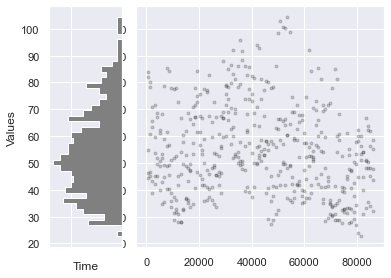

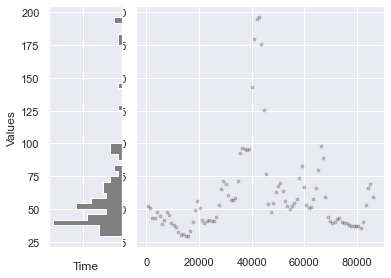

In [40]:
plot_rgr_dist(days_of_week_timestamp,days_of_week_data)
plot_rgr_dist(weekdays_test_timestamp,weekdays_test_values)

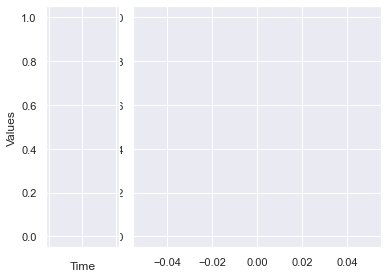

In [41]:
plot_rgr_dist(weekends_timestamp,weekends_data)

In [42]:
def convert_hour(timestamp):
    timestamp = pd.to_datetime(timestamp)

    timestamp = timestamp.hour * 3600 + \
                  timestamp.minute * 60 + \
                  timestamp.second
    return timestamp

hour = convert_hour('23:59:59')
hour

86399

In [43]:
X_weekday = []
y_weekday = []
X_weekend = []
y_weekend = []
week_detec = []
week_detec_ts = []
weekend_detec = []
weekend_detec_ts = []
test_week_detec = []
test_week_detec_ts = []
X_test = []
y_test = []

time = min(weekdays['timestamp'].values)
hour = 1
hour = 3600*hour
day = 24*60*60
m = 4

for i in range(int(day/hour)*m):
    X_weekday.append(weekdays[(weekdays['timestamp']>=time)&(weekdays['timestamp']<time+hour)]['timestamp'].values)
    y_weekday.append(weekdays[(weekdays['timestamp']>=time)&(weekdays['timestamp']<time+hour)]['values'].values)
    y_test.append(weekdays_test[(weekdays_test['timestamp']>=time)&(weekdays_test['timestamp']<time+hour)]['values'].values)
    test_week_detec.append(weekdays_test[(weekdays_test['timestamp']>=time)&(weekdays_test['timestamp']<time+hour)]['detection'].values)
    X_test.append(weekdays_test[(weekdays_test['timestamp']>=time)&(weekdays_test['timestamp']<time+hour)]['timestamp'].values)
    time += hour/m

In [44]:
count = 0
for i in range(len(test_week_detec)):
    for j in range(len(test_week_detec[i])):
        if test_week_detec[i][j] == 1:
            count +=1
            
count

40

In [45]:
weekdays.sort_values(by=['dayofweek','timestamp'])

,dayofweek,timestamp,values,detection
384,0,450,44.526000,0
385,0,1350,60.898514,0
386,0,2250,63.219319,0
387,0,3150,53.738597,0
388,0,4050,51.840861,0
...,...,...,...,...
379,4,82350,39.990917,0
380,4,83250,33.323361,0
381,4,84150,35.285903,0
382,4,85050,34.005347,0


# Treino do Regressor

In [46]:
X = X_weekday.copy()
y = y_weekday.copy()

In [47]:
gamma = 'scale'
epsilon_val = 10
epsilon = []

for i in range(len(X)):
    epsilon.append(epsilon_val * numpy.std(y[i]))

In [48]:
svr_rbf = []
for i in range(len(X)):
    svr_rbf.append(svm.SVR(kernel='rbf', epsilon=0.5, gamma='scale'))
    #svr_rbf.append(svm.SVR(kernel='rbf', epsilon=epsilon[i], gamma='scale',C=C[i]))

In [49]:
def fit_model(X,y,svr):
    regressor = svr.fit(X,y)
    y_pred = regressor.predict(X)
    return regressor, y_pred

In [50]:
regressor = []
    
for i in range(len(X)):
    regressor.append(fit_model(numpy.array(X[i]).reshape(-1,1),numpy.array(y[i]),svr_rbf[i]))

In [51]:
y_pred = []
    
for i in range(len(X)):
    y_pred.append((regressor[i][1]))

In [52]:
plus_epsilon = []
minus_epsilon = []

for i in range(len(X)):
    plus_epsilon.append(epsilon_val + y_pred[i])
    minus_epsilon.append(y_pred[i] - epsilon_val)

## Comparação entre os valores previstos e os valores de teste

In [53]:
event = []
X_event = []
y_anomalies_dataset = []
Nsv_dataset = []
y_anomalies_test = []
        
for i in range(len(y)):
    event.append([])
    X_event.append([])
    y_anomalies_dataset.append([])
    Nsv_dataset.append([])
    for j in range(len(y[i])):
            if y[i][j] > plus_epsilon[i][j]:
                event[i].append(y[i][j])
                X_event[i].append(X[i][j])
                y_anomalies_dataset[i].extend([1])
                Nsv_dataset[i].extend([1])
            else:
                y_anomalies_dataset[i].extend([0])

In [54]:
event_test = []
X_test_event = []
y_anomalies_test = []
Nsv_test = []
normal_test = []
X_normal_test = []

for i in range(len(y_test)):
    event_test.append([])
    X_test_event.append([])
    y_anomalies_test.append([])
    Nsv_test.append([])
    normal_test.append([])
    X_normal_test.append([])
    for j in range(len(y_test[i])):
        if y_test[i][j] > plus_epsilon[i][j]:   
            event_test[i].append(y_test[i][j])
            X_test_event[i].append(X_test[i][j])
            y_anomalies_test[i].extend([1])
            Nsv_test[i].extend([1])
        else:
            y_anomalies_test[i].extend([0])
            normal_test[i].append(y_test[i][j])
            X_normal_test[i].append(X_test[i][j])

In [55]:
hour_label = np.arange(0,len(X),1)

In [56]:
X_plot = []
y_plot = []
y_pred_plot = []
plus_epsilon_plot = []
minus_epsilon_plot = []

for i in range(len(X)):
    X_plot.append([])
    y_plot.append([])
    y_pred_plot.append([])
    plus_epsilon_plot.append([])
    minus_epsilon_plot.append([])
    X_plot[i], y_plot[i], y_pred_plot[i], plus_epsilon_plot[i], minus_epsilon_plot[i] = zip(*sorted(zip(X[i], y[i], y_pred[i],plus_epsilon[i], minus_epsilon[i])))

In [57]:
"""for i in range(len(X)):
    plt.scatter(X_plot[i],y_plot[i])
    #plt.scatter(X_event[i],event[i],label="Ocurrence",color='red')
    plt.scatter(X_test_event[i],event_test[i],color="red")
    plt.plot(X_plot[i],plus_epsilon_plot[i],'--',color='blue',label='epsilon')
    plt.plot(X_plot[i],minus_epsilon_plot[i],'--',color='blue')
    plt.plot(X_plot[i], y_pred_plot[i],color = 'orange', label='prediction')
    plt.title(hour_label[i]+1)
    plt.legend()
    plt.show()"""

'for i in range(len(X)):\n    plt.scatter(X_plot[i],y_plot[i])\n    #plt.scatter(X_event[i],event[i],label="Ocurrence",color=\'red\')\n    plt.scatter(X_test_event[i],event_test[i],color="red")\n    plt.plot(X_plot[i],plus_epsilon_plot[i],\'--\',color=\'blue\',label=\'epsilon\')\n    plt.plot(X_plot[i],minus_epsilon_plot[i],\'--\',color=\'blue\')\n    plt.plot(X_plot[i], y_pred_plot[i],color = \'orange\', label=\'prediction\')\n    plt.title(hour_label[i]+1)\n    plt.legend()\n    plt.show()'

## Janela Móvel

In [58]:
def window(a, w, o, copy = False):
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
    if copy:
        return view.copy()
    else:
        return view
    
n = 4
step = 1

In [59]:
y_anomalies_test = y_anomalies_test[:-(m-1)]
test_week_detec = test_week_detec[:-(m-1)]

In [60]:
occurrences_real = []
col_size_real = []

for i in range(len(test_week_detec)):
    occurrences_real.append([])
    col_size_real.append([])
    for j in range(len(test_week_detec[i])):
        occurrences_real[i] = window(numpy.array(test_week_detec[i]),n,step)
        col_size_real[i] = len(occurrences_real[i])

In [61]:
occurrences_test = []
col_size_test = []

for i in range(len(y_anomalies_test)):
    occurrences_test.append([])
    col_size_test.append([])
    for j in range(len(y_anomalies_test[i])):
        if i < 94:
            occurrences_test[i] = window(numpy.array(y_anomalies_test[i]),n,step)
            col_size_test[i] = len(occurrences_test[i])

## Distribuição de Bernoulli 

In [62]:
def bernoulli_dist(n,r,p):
    bernoulli = ((math.factorial(n))/((math.factorial(r))*(math.factorial(n-r))))*(p**r)*((1-p)**(n-r))
    bernoulli = 1 - bernoulli
    return bernoulli

In [63]:
r_real = []

for i in range(len(col_size_real)):
    r_real.append([])
    for j in range(col_size_real[i]):
        r_real[i].append(0)
            
count_one = 0
for i in range(len(occurrences_real)):
    for j in range(len(occurrences_real[i])):
        for k in range(len(occurrences_real[i][j])):
            if occurrences_real[i][j][k] == 1:
                count_one += 1
                r_real[i][j] = count_one
            if k == (n-1):
                count_one = 0

In [64]:
window_detect = []

for i in range(len(r_real)):
    for j in range(len(r_real[i])):
        if r_real[i][j] >= 1:
            window_detect.append(1)
        else:
            window_detect.append(0)
        

In [65]:
r_test = []
for i in range(len(col_size_test)):
    r_test.append([])
    for j in range(col_size_test[i]):
        r_test[i].append(0)
            
count_one = 0
for i in range(len(occurrences_test)):
    for j in range(len(occurrences_test[i])):
        for k in range(len(occurrences_test[i][j])):
            if occurrences_test[i][j][k] == 1:
                count_one += 1
                r_test[i][j] = count_one
            if k == (n-1):
                count_one = 0

In [66]:
index_occur_real = []

for i in range(len(r_real)):
    index_occur_real.append([])
    for j in range(len(r_real[i])):
        if r_real[i][j] >= 1:
            index_occur_real[i].append(j)

In [67]:
p_dataset = []

for i in range(len(y)):
    p_dataset.append(len(Nsv_dataset[i])/len(X[i]))


In [68]:
detect_test = []
plot_proba = []

for i in range(len(occurrences_test)):
    detect_test.append([])
    for j in range(len(occurrences_test[i])):
        detect_test[i].append(0)
    
for i in range(len(col_size_test)):
    for j in range(col_size_test[i]):
        detect_test[i][j] = bernoulli_dist(n,r_test[i][j],p_dataset[i])
        plot_proba.append(bernoulli_dist(n,r_test[i][j],p_dataset[i]))

# Resultados

Text(0, 0.5, 'Probability')

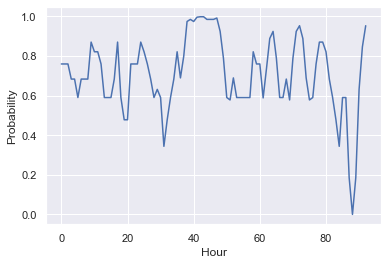

In [69]:
plt.plot(plot_proba)
#plt.xticks(np.arange(0, 24, 1))
plt.xlabel('Hour')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

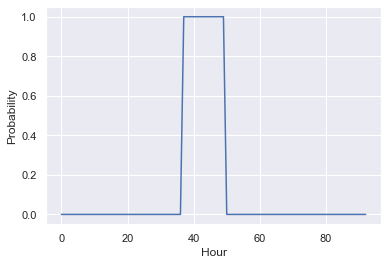

In [70]:
plt.plot(window_detect)
#plt.xticks(np.arange(0, 24, 1))
plt.xlabel('Hour')
plt.ylabel('Probability')

In [71]:
treshold = 0.95

In [72]:
detect_array = []
for i in plot_proba:
    if i >= treshold:
        detect_array.append(1)
    else:
        detect_array.append(0)

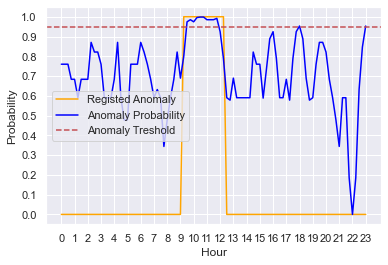

In [73]:
plt.plot(window_detect,label='Registed Anomaly',color='orange')
plt.plot(plot_proba,label='Anomaly Probability',color='blue')
plt.xticks(np.arange(0,96,4),np.arange(0,24,1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(y=treshold, color='r', linestyle='--',label="Anomaly Treshold")
plt.xlabel('Hour')
plt.ylabel('Probability')
plt.legend()
plt.show()

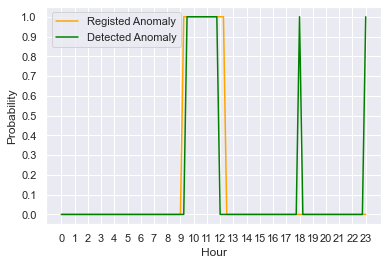

In [74]:
plt.plot(window_detect,label='Registed Anomaly',color='orange')
plt.plot(detect_array,label='Detected Anomaly',color='green')
plt.xticks(np.arange(0,96,4),np.arange(0,24,1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Hour')
plt.ylabel('Probability')
plt.legend()
plt.show()

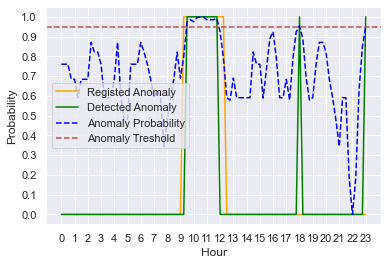

In [75]:
plt.plot(window_detect,label='Registed Anomaly',color='orange')
plt.plot(detect_array,label='Detected Anomaly',color='green')
plt.plot(plot_proba,label='Anomaly Probability',linestyle='--',color='blue')
plt.xticks(np.arange(0,96,4),np.arange(0,24,1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(y=treshold, color='r', linestyle='--',label="Anomaly Treshold")
plt.xlabel('Hour')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [76]:
index_occur_test = []
for i in range(len(plot_proba)):
    if plot_proba[i] >= treshold:
        index_occur_test.append(i)

In [77]:
index_occur_real = []
for i in range(len(window_detect)):
    if window_detect[i] == 1:
        index_occur_real.append(i)

In [78]:
counter_t_test = 0
counter_f_test = 0
not_detected_test = 0

for i in index_occur_real:
    if i in index_occur_test: 
        counter_t_test += 1
        
for i in index_occur_test:
    if i not in index_occur_real:
        counter_f_test += 1

for i in index_occur_real:
    if i not in index_occur_test: 
        not_detected_test += 1

In [79]:
total_occur = len(index_occur_real)

In [80]:
counter_t_test

10

In [81]:
counter_f_test

2

In [82]:
not_detected_test

3

## Rácio de Acerto

In [83]:
try:
    print(counter_t_test/total_occur)
except:
    pass

0.7692307692307693


## Rácio de Falha 

In [84]:
try:
    print(counter_f_test/total_occur)
except:
    pass

0.15384615384615385


## Rácio de Não Deteções

In [85]:
try:
    print(not_detected_test/total_occur)
except:
    pass

0.23076923076923078


In [86]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i] == 1 and y_hat[i] >= treshold:
           TP += 1
        if y_hat[i] >= treshold and y_actual[i] != 1:
           FP += 1
        if y_actual[i] == 0 and y_hat[i] < treshold:
           TN += 1
        if y_hat[i] < treshold and y_actual[i] != 0:
           FN += 1

    return(TP, FP, TN, FN)

In [87]:
results = []
results_label = ['True Positives','False Positives','True Negatives','False Negatives']

for i in range(4):
    results.append(perf_measure(window_detect,plot_proba)[i])
    print(results_label[i],':',results[i])

TP = results[0]
FP = results[1]
TN = results[2]
FN = results[3]

True Positives : 10
False Positives : 2
True Negatives : 78
False Negatives : 3


In [88]:
try:
    accuracy = (TP+TN)/(TP+TN+FN+FP)
    print('Accuracy:',"%.2f" %accuracy)
    recall = TP/(TP+FN)
    print('Recall:',"%.2f" %recall)
    precision=TP/(TP+FP)
    print('Precision:',"%.2f" %precision)
    if recall+precision == 0:
        print('There are not any True Positives')
    else:
        F_score = (2*precision*recall)/(precision+recall)
        print('F score:',"%.2f" %F_score)
except:
    pass

Accuracy: 0.95
Recall: 0.77
Precision: 0.83
F score: 0.80


In [89]:
rms = []
rmse = []
for i in range(len(y)):
    rms.append(mean_squared_error(y[i], y_pred[i], squared=False))
    rmse.append(sqrt(rms[i]))